In [ ]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 5.8MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
# Renomear as colunas para pt-br
a_renomear = {
    'unfinished' : 'nao_finalizado',
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco'
}

dados = dados.rename(columns = a_renomear)
dados.head()

# o contrári de head é tail

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
# invertendo a primeira coluna, ao invés de ser 1 para não finalizado e 0 para finalizado
# a lógica será agora em função do finalizado, 1:finalizado, 0: não finalizado

troca = {
    1 : 0,
    0: 1
}

#vai criar uma nova coluna
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [ ]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


Nesse caso tempos 2 features (horas esperadas e preço)
e 1 classificação (finalizado), que é determinado de acordo com as features

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


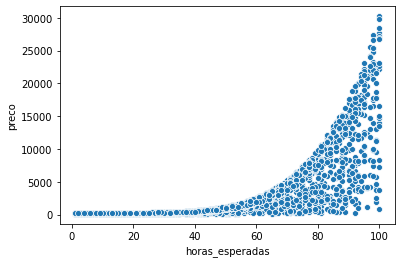

In [ ]:
# precisou fazer o import da versão mais att do seaborn pq o collab tem, por default, uma versão antiga que não suporta
# o scatterplot

import seaborn as sns

sns.scatterplot(x = "horas_esperadas", y= "preco", data = dados)

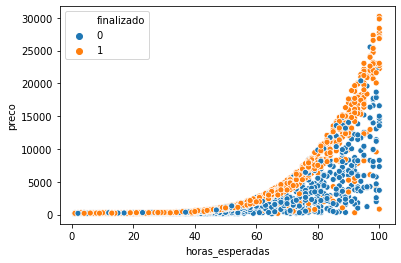

In [ ]:
#mesmo gráfico, porém incluindo a informação sobre a finalização
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

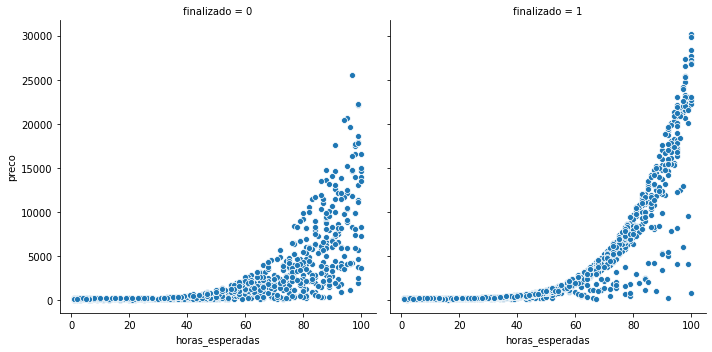

In [ ]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

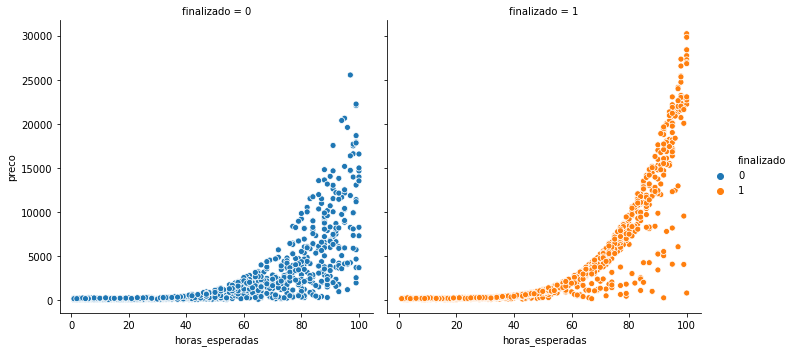

In [ ]:
#mesma separação que a anterior, porém com cores diferentes para as diferentes colunas
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [ ]:
#começando o modelo

x=dados[['horas_esperadas', 'preco']]
y=dados['finalizado']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,
                                                        random_state = SEED, 
                                                        test_size = 0.25, 
                                                        stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC(random_state=SEED)
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)*100
print ("A acurácia foi %.2f%%" % acuracia)

# O resultado muda rodando várias vezes porque o LinearSVC usa um valor aleatório
# Uma opção, passar o random_state como parâmetro
# modelo = LinearSVC(random_state=SEED)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 47.41%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#Baseline :  se todos forem iguais a um
import numpy as np
previsoes_de_base = np.ones(540)

acuracia = accuracy_score(teste_y,previsoes_de_base)*100
print ("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia)

#o modelo tem que ser, minimamente, melhor que o baseline

A acurácia do algoritmo de baseline foi 52.59%


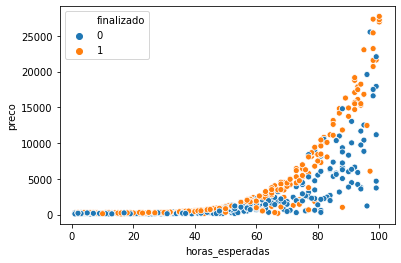

In [ ]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(x_min,x_max, y_min, y_max)

1 100 101 27738


In [ ]:

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [ ]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [ ]:
Z = modelo.predict(pontos)
#redimensionando o Z de acordo com o shape do XX
#vai passar de 1000 para 100x100
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

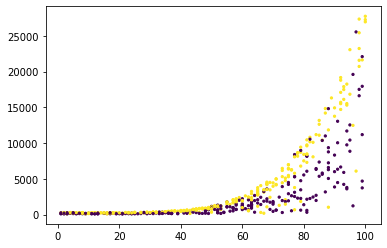

In [ ]:
import matplotlib.pyplot as plt

#tem um controle mais fino que o scatterplot do seaborn
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=5)
#s é o tamanho dos pontos e c a cor

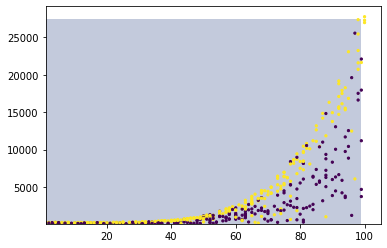

In [ ]:
 plt.contourf(xx,yy, Z, alpha = 0.3)
 
 plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=5)


 #DECISION BOUNDARY

In [ ]:

#Se alterar o SEED também muda

Tentando com outro método do sklearn. 

*   SVC: não linear



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,
                                                        random_state = SEED, 
                                                        test_size = 0.25, 
                                                        stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(random_state=SEED)
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)*100
print ("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


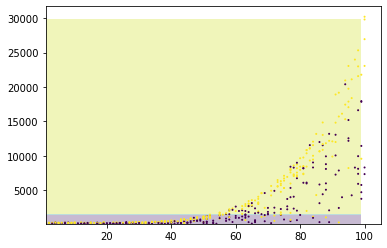

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx,yy, Z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

#DECISION BOUNDARY

As diferentes escalas nos eixos impactam estimador. A escala em x vai de 0-100 e em y de 0-30000, portanto y terá um "impacto/importância" diferente. Para adequar isso, faz-se um ajuste de escala.

Depois do ajuste, usaremos o mesmo estimado, SVC.

In [ ]:
from sklearn.preprocessing import StandardScaler
#ainda tem o random_state
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x),len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo=SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


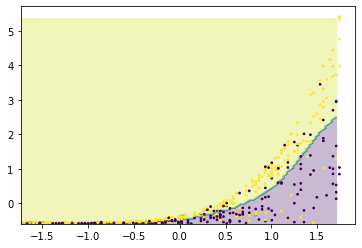

In [ ]:
# O formato de treino_x mudou. Não é mas um df do pandas, é um array de arrays agora.
#Já que hoouve ajuste de escala, os pontos foram recalculados e reformatados

data_x = teste_x[:,0] #Respeectivo ao antigo horas_esperadas
data_y = teste_x[:,1] #Respeectivo ao antigo preco

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels=100
eixo_x = np.arange(x_min,x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx,yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=3)

Por mais que LinearSVC tenha tido uma taxa razoável de 64.44%, a linha de decisão na plotagem foi horrível. Na prática, utilizar o SVC parece ser uma decisão melhor: temos uma curva de decisão bem marcada e o estimador possui uma taxa de acerto um pouco maior, de 66.85%.